In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-cancer-recurrence-dataset/filtered_thyroid_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/thyroid-cancer-recurrence-dataset/filtered_thyroid_data.csv")
df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [4]:
df.isnull().sum()

Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64

In [5]:
df.duplicated().sum()

53

In [6]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
df['age_group'] = ['Senior' if age > 50 else 'Adult' for age in df['age']]
df.head()

,age,gender,hx_radiothreapy,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred,age_group
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,Adult
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Adult
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Adult
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Senior
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,Senior


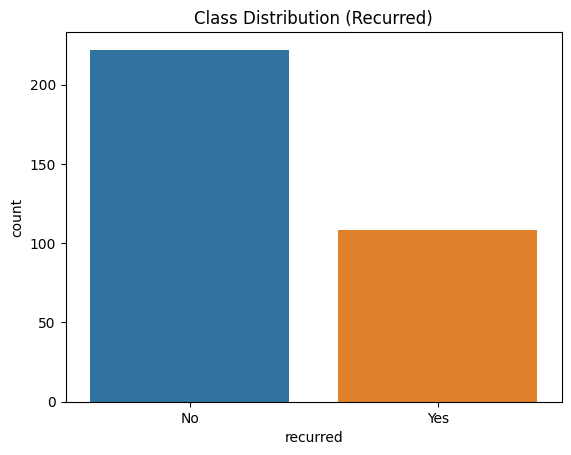

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='recurred', data=df)
plt.title("Class Distribution (Recurred)")
plt.show()

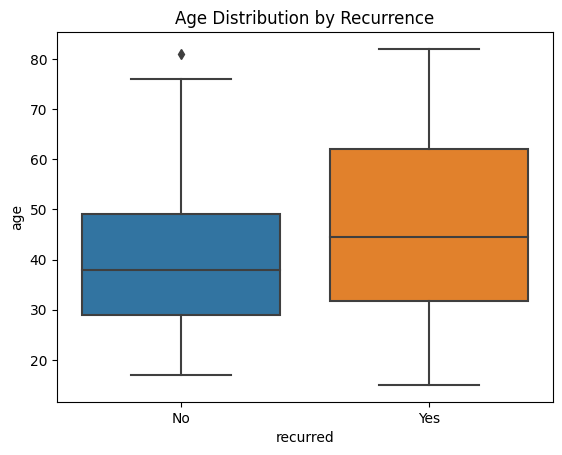

In [11]:
sns.boxplot(x='recurred', y='age', data=df)
plt.title("Age Distribution by Recurrence")
plt.show()

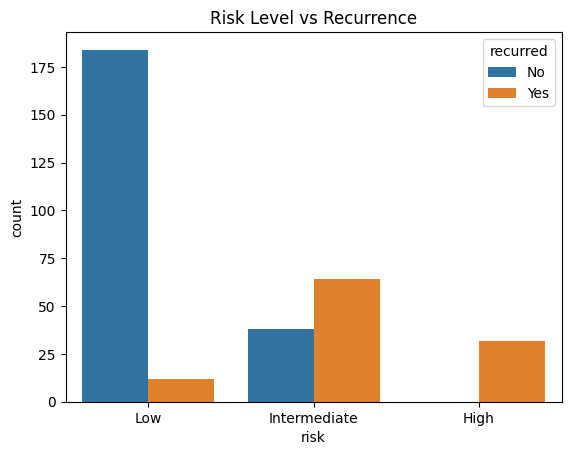

In [12]:
sns.countplot(x='risk', hue='recurred', data=df)
plt.title("Risk Level vs Recurrence")
plt.show()

In [13]:
df['recurred'] = df['recurred'].map({'No': 0, 'Yes': 1})

In [14]:
df_encoded = pd.get_dummies(df.drop(columns=['recurred']), drop_first=True)

In [15]:
X = df_encoded
y = df['recurred']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39  1]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.96      0.85      0.90        26

    accuracy                           0.92        66
   macro avg       0.93      0.91      0.92        66
weighted avg       0.93      0.92      0.92        66



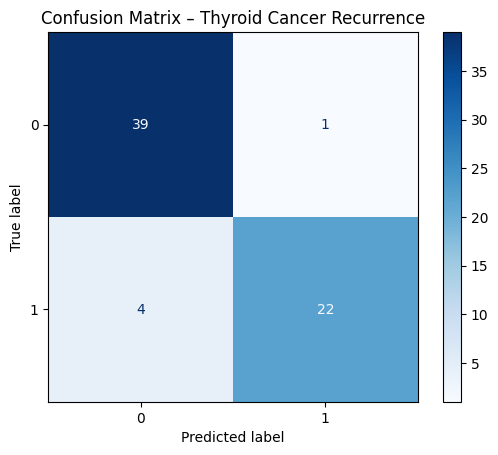

In [17]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix – Thyroid Cancer Recurrence")
plt.show()


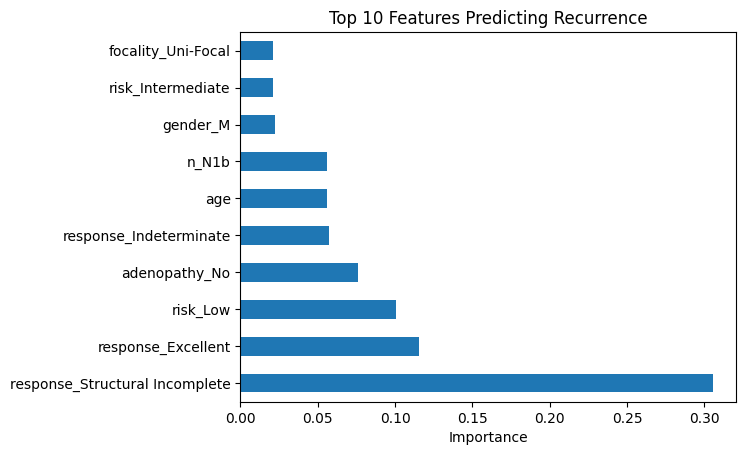

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Predicting Recurrence")
plt.xlabel("Importance")
plt.show()


In [19]:
df.to_csv("thyroid_cancer.csv", index=False)